In [49]:
import pandas as pd
import datetime
import yfinance as yf
import requests
import io
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math

In [50]:
# Comment this to get the all-symbols
symbols = ["AAL", "AAPL", "DAL", "FB", "AMZN", "TSLA", "MSFT", "CRM", "F"]

In [51]:
stock_data = pd.DataFrame()
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 12, 1)

In [52]:
def sma(data, n):
    sma_values = pd.Series(data['Close'].rolling(n).mean(), name='Sma')
    data = data.join(sma_values)
    return data


def ewma(data, n):
    ema = pd.Series(data['Close'].ewm(span=n, min_periods=n - 1).mean(),
                    name='Ewma_' + str(n))
    data = data.join(ema)
    return data


def cci(data, n):
    TP = (data['High'] + data['Low'] + data['Close']) / 3
    cci_values = pd.Series((TP - TP.rolling(n).mean()) / (0.015 * TP.rolling(n).std()),
                           name='Cci')
    data = data.join(cci_values)
    return data

In [53]:
for symbol in symbols:
    try:
        s = []
        n = 15
        s = yf.download(symbol, start=start, end=end)
        if s is not None and len(s) > 0:
            s['Name'] = symbol

            # Getting simple moving average
            s = sma(s, n)
            s = s.dropna()

            # Exponentially weighted moving average
            s = ewma(s, n)
            s = s.dropna()

            # Commodity Channel Index
            s = cci(s, n)
            s = s.dropna()

            stock_data = stock_data.append(s, sort=False)
    except Exception:
        None

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [54]:
stock_data.head(1)

,Open,High,Low,Close,Adj Close,Volume,Name,Sma,Ewma_15,Cci
Date,,,,,,,,,,
2016-03-03,41.52,42.240002,41.23,41.880001,40.131638,8812800,AAL,40.131334,40.440453,76.573999


In [69]:
stock_data.groupby("Name").mean().round(2)

,Open,High,Low,Close,Adj Close,Volume,Sma,Ewma_15,Cci
Name,,,,,,,,,
AAL,35.13,35.66,34.57,35.08,34.28,1.858523e+07,35.24,35.24,-0.91
AAPL,51.25,51.81,50.72,51.29,49.84,1.290359e+08,50.75,50.75,31.75
AMZN,1561.42,1577.66,1542.78,1561.00,1561.00,4.364737e+06,1545.88,1545.80,28.93
CRM,131.11,132.65,129.39,131.12,131.12,5.661316e+06,130.03,130.03,21.60
DAL,47.78,48.37,47.14,47.73,45.66,1.228114e+07,47.79,47.79,5.94
F,10.18,10.28,10.07,10.17,8.97,4.617800e+07,10.19,10.19,-0.06
FB,172.71,174.64,170.74,172.79,172.79,2.111772e+07,171.81,171.80,21.17
MSFT,110.45,111.51,109.30,110.47,107.63,2.901662e+07,109.52,109.52,33.47
TSLA,95.12,97.30,92.86,95.19,95.19,4.173214e+07,92.37,92.46,15.25


In [55]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10764 entries, 2016-03-03 to 2020-11-30
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10764 non-null  float64
 1   High       10764 non-null  float64
 2   Low        10764 non-null  float64
 3   Close      10764 non-null  float64
 4   Adj Close  10764 non-null  float64
 5   Volume     10764 non-null  int64  
 6   Name       10764 non-null  object 
 7   Sma        10764 non-null  float64
 8   Ewma_15    10764 non-null  float64
 9   Cci        10764 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 925.0+ KB


In [56]:
symbols

['AAL', 'AAPL', 'DAL', 'FB', 'AMZN', 'TSLA', 'MSFT', 'CRM', 'F']

# Plotting Stock Prices on Double Y-Axis plot to determine correlations

In [57]:
two_stocks = ['TSLA', 'F']

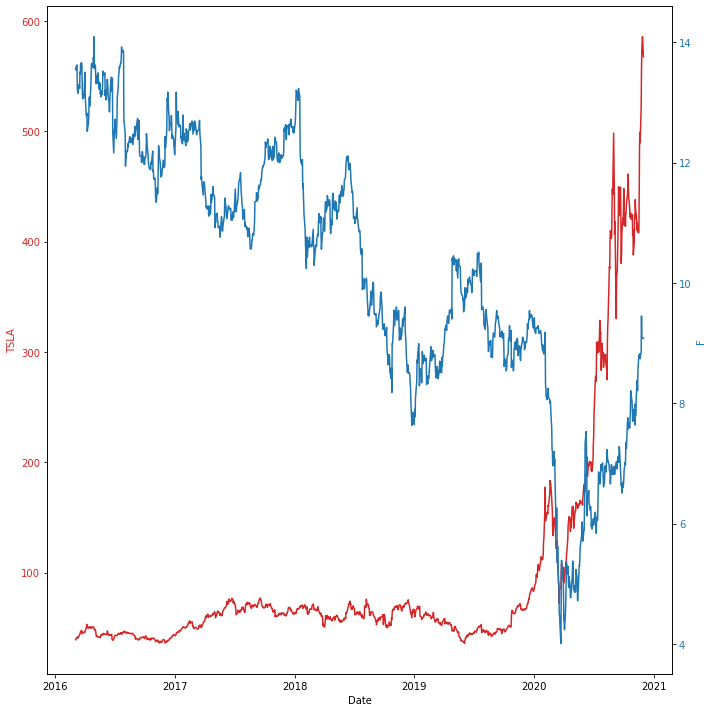

In [58]:
fig, ax1 = plt.subplots(figsize=(10, 10))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel(two_stocks[0], color=color)
ax1.plot(stock_data[stock_data.Name == two_stocks[0]].index.values, stock_data[stock_data.Name == two_stocks[0]].Close, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(two_stocks[1], color=color)  # we already handled the x-label with ax1
ax2.plot(stock_data[stock_data.Name == two_stocks[1]].index.values, stock_data[stock_data.Name == two_stocks[1]].Close, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [46]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def mse(x, y): return ((x-y)**2).mean()

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_val), y_val),
                m.score(X_train, y_train), m.score(X_val, y_val)]
    print(f"rmse train {res[0]}, rmse val {res[1]}, r^2 train {res[2]}, r^2 val {res[3]}")
    res = [mse(m.predict(X_train), y_train), mse(m.predict(X_val), y_val),
                m.score(X_train, y_train), m.score(X_val, y_val)]
    print(f"mse train {res[0]}, mse val {res[1]}, r^2 train {res[2]}, r^2 val {res[3]}")

# Random Forest Regressor to predict $MSFT

In [12]:
features = ['High', 'Low', 'Ewma_15']

In [13]:
for symbol in symbols:
    dataset = stock_data[stock_data.Name == symbol]
    X_df = dataset[features]
    y_df = dataset['Close']

    TOTAL = dataset.count()[0] 
    N_VALID = int( TOTAL * (1/3))
    TRAIN = int(TOTAL - N_VALID )

    X_train, X_val = X_df[:TRAIN], X_df[TRAIN:]
    y_train, y_val = y_df[:TRAIN], y_df[TRAIN:]

    model = RandomForestRegressor(n_estimators=100,bootstrap=True, min_samples_leaf=1, max_depth=10)
    model.fit(X_train, y_train)

    print(symbol)
    print_score(model)
    print("----------------------------------")

AAL
rmse train 0.1733279006932176, rmse val 0.2768624314363632, r^2 train 0.9947497708840009, r^2 val 0.8986710006700621
mse train 0.030042561158717902, mse val 0.07665280594085491, r^2 train 0.9947497708840009, r^2 val 0.8986710006700621
----------------------------------
AAPL
rmse train 0.5131484218645317, rmse val 4.266112795529098, r^2 train 0.9991747929267586, r^2 val 0.2813178781036241
mse train 0.2633213028620594, mse val 18.199718384177096, r^2 train 0.9991747929267586, r^2 val 0.2813178781036241
----------------------------------
DAL
rmse train 0.3141737192517759, rmse val 1.154343843716038, r^2 train 0.9968857431169136, r^2 val 0.8524079911135759
mse train 0.09870512586849368, mse val 1.332509709525117, r^2 train 0.9968857431169136, r^2 val 0.8524079911135759
----------------------------------
FB
rmse train 1.3071891720266648, rmse val 5.64326031620803, r^2 train 0.9987586549696157, r^2 val 0.7759044501428538
mse train 1.7087435314637578, mse val 31.846386996488352, r^2 train